In [2]:
#Simulations
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment
from tqdm import tqdm
from utils import generate_dataset, EMV, EMV_mistakes, generate_initial_positions, generate_noisy_versions
import math
from scipy.special import gamma
import matplotlib

100%|██████████| 10000/10000 [09:37<00:00, 17.30it/s]


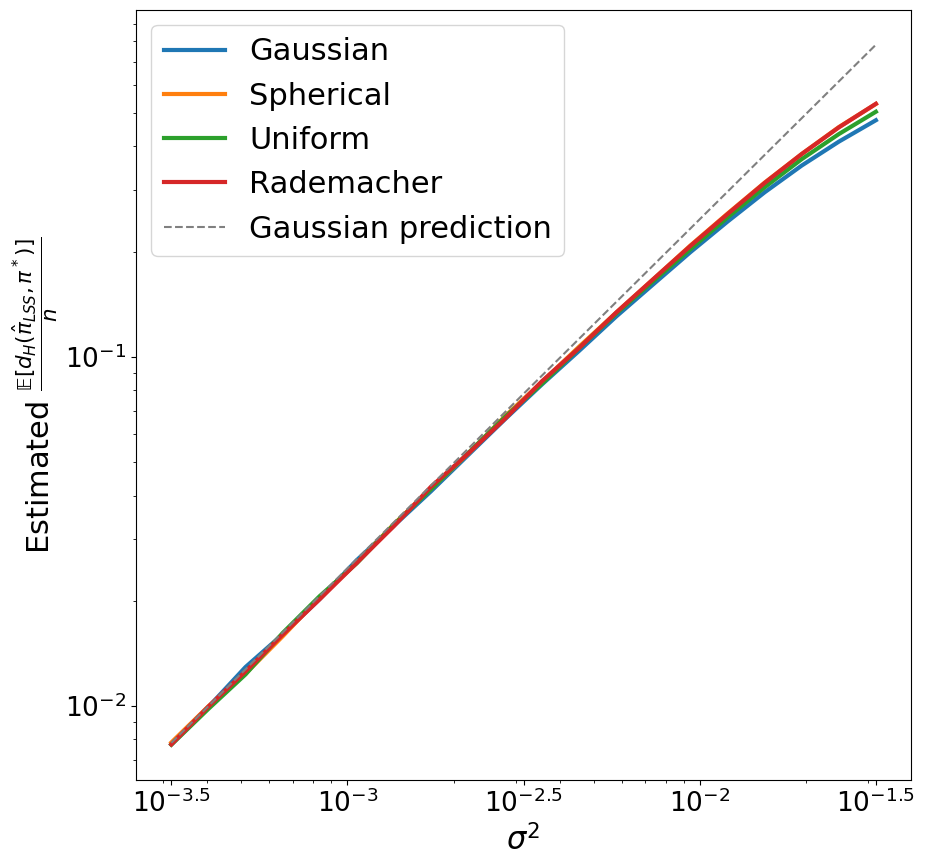

In [8]:
d = 2
n_rep = 10000
n = 100
m = 20
sigma2 = np.logspace(-3.5,-1.5,m)
noise_dists = ["Gaussian","Spherical","Uniform","Rademacher"]
n_d = len(noise_dists)

n_mistakes = [np.zeros(m) for _ in range(0,n_d)]

fontsize = 22

lw = 3

for i in tqdm(range(n_rep)):
    x = generate_initial_positions(n,d, seed = None)
    for i in range(0,m):
        for k in range(0,n_d):
            y = generate_noisy_versions(x,n, d, sigma2[i], seed = None, noise_dist=noise_dists[k])
            pi = EMV(x,y)
            n_mistakes[k][i] += EMV_mistakes(pi)[1]

rate_n_mistakes = []

fig, axs = plt.subplots(1,1,figsize=(10,10))

for k in range(0,n_d):
    rate_n_mistakes.append(n_mistakes[k]/(n*n_rep))
    axs.plot(sigma2, rate_n_mistakes[k], label=noise_dists[k], linewidth=lw)

predicted_ratio = 1/n*(n*(n-1) * np.sqrt(sigma2)**d * 2**(-d) * gamma(d)/(gamma(d/2+1)*gamma(d/2)) )

error_rate_str = r'$\frac{\mathrm{\mathbb{E}}[d_H(\hat{\pi}_{LSS},\pi^*)]}{n}$'

axs.plot(sigma2, predicted_ratio, color="gray", linestyle="--", label = "Gaussian prediction")
axs.set_xlabel(r'$\sigma^2$', fontsize=fontsize)
axs.set_ylabel("Estimated " + error_rate_str, fontsize=fontsize)
axs.set_yscale('log')
axs.set_xscale('log')
axs.set_xticks(ticks=[10**(-3.5), 10**(-3), 10**(-2.5), 10**(-2), 10**(-1.5)], labels=[r"$10^{-3.5}$",r"$10^{-3}$",r"$10^{-2.5}$",r"$10^{-2}$",r"$10^{-1.5}$"])
axs.xaxis.set_tick_params(labelsize=19)
axs.yaxis.set_tick_params(labelsize=19)

axs.legend(fontsize=fontsize)

plt.savefig(f"comparison_n={n}_d={d}_rep={n_rep}_subgaussians.pdf")

100%|██████████| 10000/10000 [06:57<00:00, 23.95it/s]


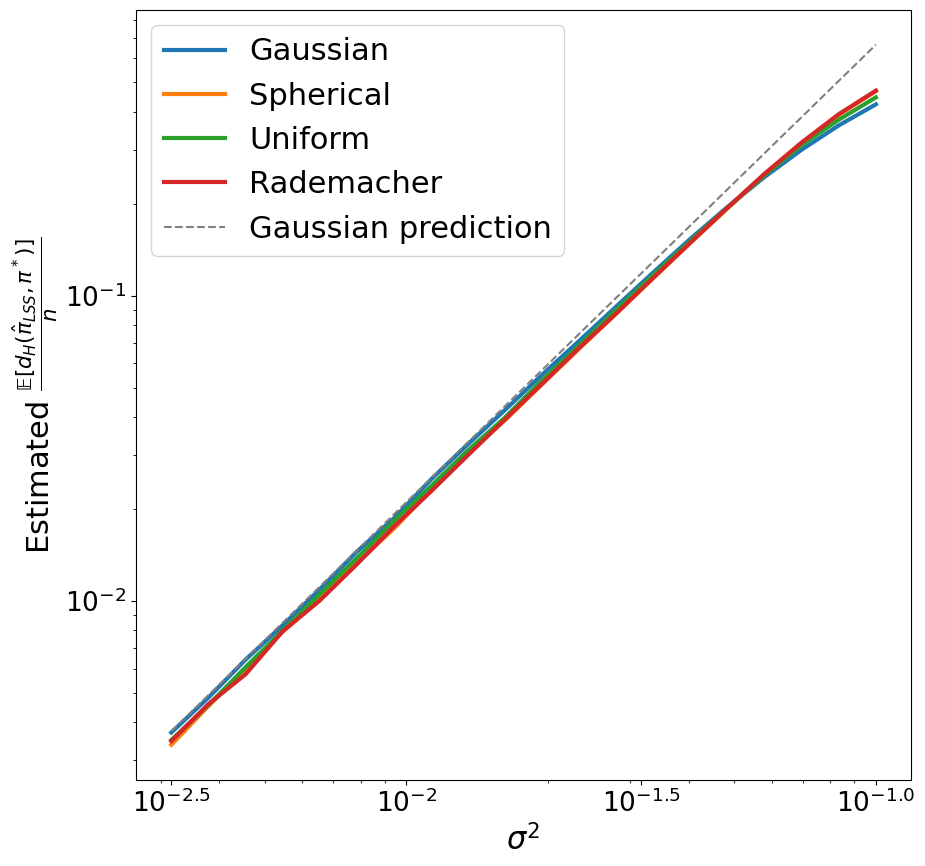

In [10]:
d = 3
n_rep = 10000
n = 100
m = 20
sigma2 = np.logspace(-2.5,-1,m)
noise_dists = ["Gaussian","Spherical","Uniform","Rademacher"]
n_d = len(noise_dists)
    
n_mistakes = [np.zeros(m) for _ in range(0,n_d)]

fontsize = 22

lw = 3

for i in tqdm(range(n_rep)):
    x = generate_initial_positions(n,d, seed = None)
    for i in range(0,m):
        for k in range(0,n_d):
            y = generate_noisy_versions(x,n, d, sigma2[i], seed = None, noise_dist=noise_dists[k])
            pi = EMV(x,y)
            n_mistakes[k][i] += EMV_mistakes(pi)[1]

rate_n_mistakes = []

fig, axs = plt.subplots(1,1,figsize=(10,10))

for k in range(0,n_d):
    rate_n_mistakes.append(n_mistakes[k]/(n*n_rep))
    axs.plot(sigma2, rate_n_mistakes[k], label=noise_dists[k], linewidth=lw)

predicted_ratio = 1/n*(n*(n-1) * np.sqrt(sigma2)**d * 2**(-d) * gamma(d)/(gamma(d/2+1)*gamma(d/2)) )

error_rate_str = r'$\frac{\mathrm{\mathbb{E}}[d_H(\hat{\pi}_{LSS},\pi^*)]}{n}$'

axs.plot(sigma2, predicted_ratio, color="gray", linestyle="--", label = "Gaussian prediction")
axs.set_xlabel(r'$\sigma^2$', fontsize=fontsize)
axs.set_ylabel("Estimated " + error_rate_str, fontsize=fontsize)
axs.set_xscale('log')
axs.set_yscale('log')
axs.set_xticks(ticks=[10**(-2.5), 10**(-2), 10**(-1.5), 10**(-1.0)], labels=[r"$10^{-2.5}$",r"$10^{-2}$",r"$10^{-1.5}$",r"$10^{-1.0}$"])
axs.xaxis.set_tick_params(labelsize=19)
axs.yaxis.set_tick_params(labelsize=19)

axs.legend(fontsize=fontsize)

plt.savefig(f"comparison_n={n}_d={d}_rep={n_rep}_subgaussians.pdf")